In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./chip_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4854 non-null   int64  
 1   Product                4854 non-null   object 
 2   Type                   4854 non-null   object 
 3   Release Date           4854 non-null   object 
 4   Process Size (nm)      4845 non-null   float64
 5   TDP (W)                4228 non-null   float64
 6   Die Size (mm^2)        4139 non-null   float64
 7   Transistors (million)  4143 non-null   float64
 8   Freq (MHz)             4854 non-null   float64
 9   Foundry                4854 non-null   object 
 10  Vendor                 4854 non-null   object 
 11  FP16 GFLOPS            536 non-null    float64
 12  FP32 GFLOPS            1948 non-null   float64
 13  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 531.0+ 

In [3]:
df = df.apply(sklearn.preprocessing.LabelEncoder().fit_transform)
df.head()

Unnamed: 0  Product  Type  Release Date  Process Size (nm)  TDP (W)  \
0           0      135     0           350                 14       44   
1           1      117     0          1216                  5       34   
2           2     2282     0          1333                  3       27   
3           3     2961     0           903                  8       78   
4           4      606     0           708                 12      112   

   Die Size (mm^2)  Transistors (million)  Freq (MHz)  Foundry  Vendor  \
0               19                     38         459        9       0   
1               90                    161         503        9       0   
2              191                    196         478        2       2   
3               77                    131         435        2       2   
4              127                    111         516        9       0   

   FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0          343          821          672  
1          343          821          672  
2          343          821          672  
3          343          821          672  
4          343          821          672

In [4]:
# 1. Зниження розмірності і візуалізація даних
tsne = sklearn.manifold.TSNE(n_components = 2, learning_rate = "auto", init = "random", perplexity = 3).fit_transform(df)
fig = px.scatter_matrix(
    tsne,
    dimensions = [0, 1],
    color = 1
)
fig.update_traces(diagonal_visible = False)
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


In [5]:
pca = sklearn.decomposition.PCA(n_components = 2)
pca.fit(df)

PCA(n_components=2)

C:\Users\tonib\AppData\Local\Temp/ipykernel_30896/4061690906.py:5: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<AxesSubplot: xlabel='pca-x', ylabel='pca-y'>

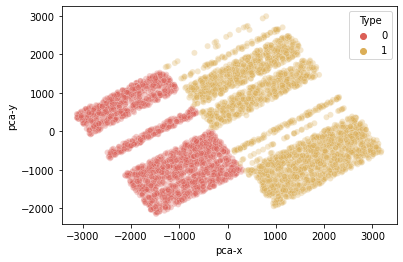

In [6]:
pca_result = pca.fit_transform(df.values)
df['pca-x'] = pca_result[:, 0]
df['pca-y'] = pca_result[:, 1]
rndperm = np.random.permutation(df.shape[0])
sns.scatterplot(
    x = "pca-x",
    y = "pca-y",
    hue = "Type",
    palette = sns.color_palette("hls", 10),
    data = df.loc[rndperm, :],
    legend = "full",
    alpha = 0.3
)

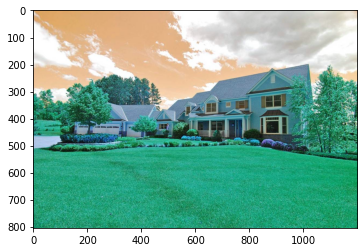

In [7]:
# 2. Кластерний аналіз
image = cv2.imread("image.jpg")
pv = image.reshape((-1, 3))
pixel_values = np.float32(pv)
plt.imshow(image)

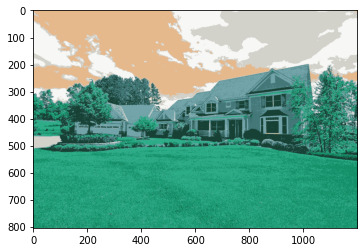

In [8]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, 8, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

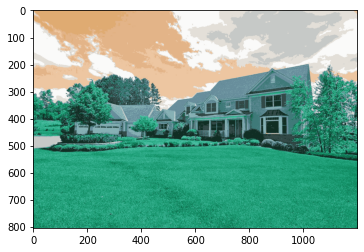

In [9]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, 16, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

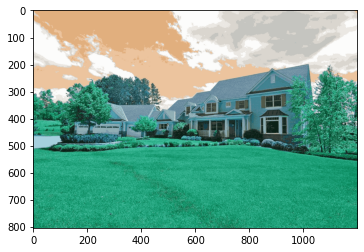

In [10]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, 32, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

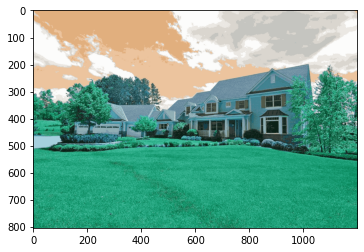

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, (centers) = cv2.kmeans(pixel_values, 64, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = segmented_image.reshape(image.shape)
plt.imshow(segmented_image)
plt.show()

In [12]:
# 3. Обробка та класифікація текстових даних
df = pd.read_csv("./top_universities.csv")
df = df.drop(["world_ranking", "region_ranking", "country_ranking", "acceptance_rate", "publication", "website", "phone_no"], axis=1)
df = df.replace({"[$&+,:;=?@#|'<>.\-^*()%!\\\[\]]":""}, regex=True)
df.head()

name         region        country  \
0                   Aarhus University         Europe          Italy   
1     Arizona State University  Tempe         Europe          Spain   
2                   Auburn University  North America  United States   
3      Australian National University  North America         Canada   
4  Autonomous University of Barcelona         Europe          Italy   

      city\state                                            address  
0         Veneto  Nordre Ringgade 1\n Aarhus Central Denmark Reg...  
1       Valencia  University Drive and Mill Avenue\n Tempe Arizo...  
2      Wisconsin  Samford Hall\n Auburn Alabama 36849 \nUnited S...  
3        Ontario  Ellery Crescent Acton\n Canberra Australian Ca...  
4  EmiliaRomagna  Campus de Bellaterra Edificio A\n Cerdanyola d...

In [13]:
df.columns = df.columns.str.strip()
cities = " ".join(i for i in df.loc[:,'city\state'])
print(cities[:30])

Veneto Valencia Wisconsin Onta


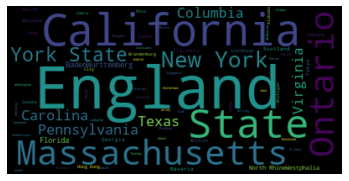

In [14]:
wc = WordCloud().generate(cities)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [15]:
names = df.loc[:, 'name']
vectorizer = TfidfVectorizer(max_features = 1500, min_df = 5, max_df = 0.7, stop_words = set(STOPWORDS))
X = vectorizer.fit_transform(names)
Y = df.loc[:, 'country']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
classifier.fit(X_train, Y_train) 
Y_pred = classifier.predict(X_test)

C:\Python310\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



In [16]:
print(confusion_matrix(Y_test, Y_pred))

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0

In [17]:
print(classification_report(Y_test, Y_pred))

                precision    recall  f1-score   support

     Australia       0.00      0.00      0.00         1
       Austria       0.00      0.00      0.00         1
       Belgium       0.00      0.00      0.00         1
        Brazil       0.00      0.00      0.00         1
        Canada       0.00      0.00      0.00         3
         China       0.00      0.00      0.00         4
       Denmark       0.00      0.00      0.00         2
       Finland       0.00      0.00      0.00         1
       Germany       0.00      0.00      0.00         2
        Greece       0.00      0.00      0.00         1
         Italy       0.00      0.00      0.00         2
         Japan       0.00      0.00      0.00         5
        Mexico       0.00      0.00      0.00         1
   Netherlands       0.00      0.00      0.00         2
        Sweden       0.00      0.00      0.00         2
   Switzerland       0.00      0.00      0.00         2
United Kingdom       0.00      0.00      0.00  

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [18]:
print(accuracy_score(Y_test, Y_pred))

0.38333333333333336
